In [1]:
import os
import cv2 #opencv
import matplotlib.pyplot as plt
import numpy as np
import dlib

# 첫번째 시도 - 웬디에게 안경씌우기

### 잘 됨!

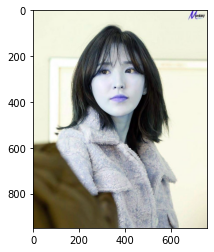

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_2.png'
img_bgr = cv2.imread(my_image_path)    # opencv로 이미지를 불러옴
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
plt.imshow(img_bgr)
plt.show()

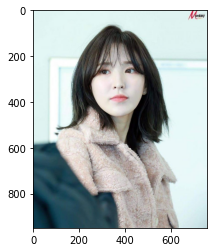

In [3]:
#cv2는 BGR을 사용하기 때문에 RGB로 바꿔주는 스텝이 필요해~
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### Bounding box, Landmark 검출

In [4]:
# bounding box 추출
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 2)   # (image, num of image pyramid)

rectangles[[(250, 199) (481, 430)]]


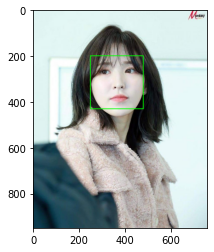

In [5]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [6]:
# Dlib의 제공되는 모델을 사용. 
# 먼저 공개되어 있는 weight file을 다운로드. 
# 해당 모델파일은 bz2 압축파일 형태로 제공되어 압축을 풀어준 후 사용.

# ! wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# ! mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models
# ! cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


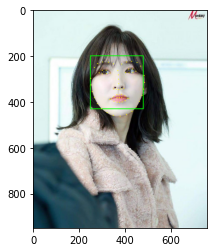

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

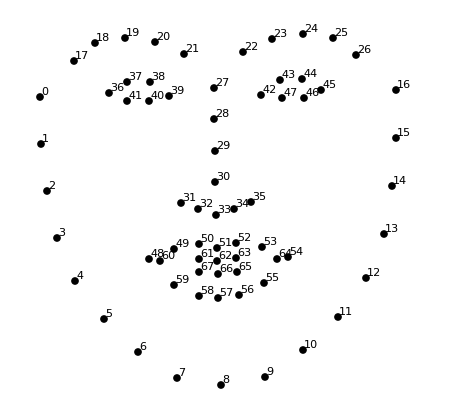

In [10]:
#!pip install IPython 
from IPython.display import Image
Image("landmarkmap.png")

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print ('미간',landmark[27])
    x = landmark[27][0]
    y = landmark[27][1]
    w = dlib_rect.width()
    h = dlib_rect.width() // 2              #안경이라 이미지의 가로:세로 비율이 2:1정도 된다고 가정함
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

미간 (370, 263)
(x,y) : (370,263)
(w,h) : (232,116)


### Sticker

In [12]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/glasses.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(116, 232, 3)


In [13]:
refined_x = x - w // 2 
refined_y = y - h // 2         # 높이도 조정하였음
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (254,205)


In [14]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (254,205)


In [15]:
# 흰 배경의 bgr값이 255임: 255인곳은 sticker_area 사용, 255가 아닌 부분은 img_sticker 사용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


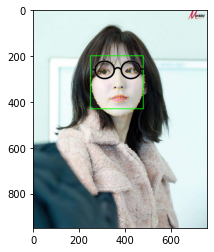

In [16]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

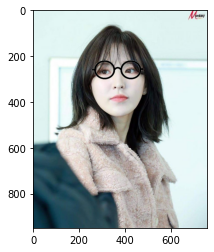

In [17]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 두번째 시도 - 태연에게 안경씌우기: 좀 더 멀리 있는 사진에도 될까?

### 정면 사진이라 그런지 잘 됨!

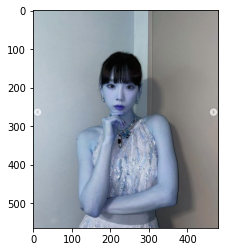

In [18]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_3.png'
img_bgr = cv2.imread(my_image_path)    # opencv로 이미지를 불러옴
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
plt.imshow(img_bgr)
plt.show()

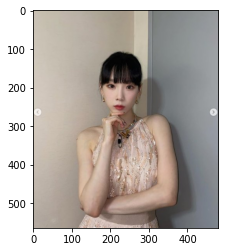

In [19]:
#cv2는 BGR을 사용하기 때문에 RGB로 바꿔주는 스텝이 필요해~
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### Bounding box, Landmark 검출

In [20]:
# bounding box 추출
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 2)   # (image, num of image pyramid)

rectangles[[(169, 170) (280, 281)]]


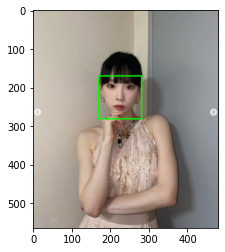

In [21]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [22]:
# Dlib의 제공되는 모델을 사용. 
# 먼저 공개되어 있는 weight file을 다운로드. 
# 해당 모델파일은 bz2 압축파일 형태로 제공되어 압축을 풀어준 후 사용.

# ! wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# ! mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models
# ! cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

In [23]:
# model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
# landmark_predictor = dlib.shape_predictor(model_path)

In [24]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


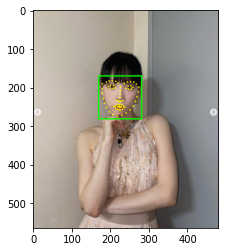

In [25]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [26]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print ('미간',landmark[27])
    x = landmark[27][0]
    y = landmark[27][1]
    w = dlib_rect.width()
    h = dlib_rect.width() // 2              #안경이라 이미지의 가로:세로 비율이 2:1정도 된다고 가정함
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

미간 (226, 199)
(x,y) : (226,199)
(w,h) : (112,56)


### Sticker

In [27]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/glasses.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(56, 112, 3)


In [28]:
refined_x = x - w // 2 
refined_y = y - h // 2         # 높이도 조정하였음
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (170,171)


In [29]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (170,171)


In [30]:
# 흰 배경의 bgr값이 255임: 255인곳은 sticker_area 사용, 255가 아닌 부분은 img_sticker 사용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


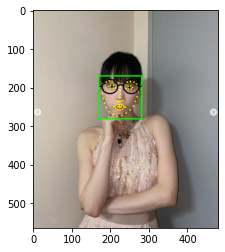

In [31]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

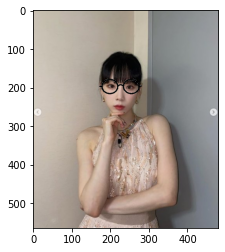

In [32]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 세번째 시도 - 장원영에게 안경씌우기: 각도가 달라도 될까?

### 두 개의 모델로 해보았지만 각도가 꺾여서 그런지 인식을 못함!

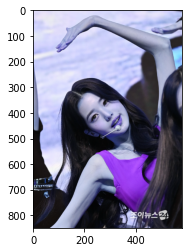

In [33]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_4.png'
img_bgr = cv2.imread(my_image_path)    # opencv로 이미지를 불러옴
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
plt.imshow(img_bgr)
plt.show()

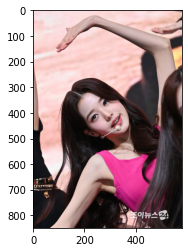

In [34]:
#cv2는 BGR을 사용하기 때문에 RGB로 바꿔주는 스텝이 필요해~
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### Bounding box, Landmark 검출

In [35]:
# bounding box 추출
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 2)   # (image, num of image pyramid)

rectangles[]


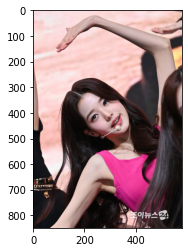

In [36]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

--> 아예 face detection을 못함. 
dlib의 대표적인 단점 중 하나: Does not work for side face and extreme non-frontal faces, like looking down or up. 때문인 것으로 추정됨.

In [37]:
# CNN Face Detector in Dlib을 사용해보자 (mmod_human_face_detector)
# !cd ~/aiffel/camera_sticker && bzip2 -d ./models/mmod_human_face_detector.dat.bz2

In [40]:
# bounding box 추출
dnnFaceDetector = dlib.cnn_face_detection_model_v1("./models/mmod_human_face_detector.dat")
faceRects = dnnFaceDetector(img_rgb, 0)

mmod_rectangles[[(180, 292) (377, 489)]]


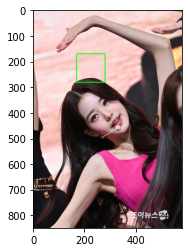

In [41]:
# 찾은 얼굴 영역 박스 리스트
print(faceRect)   

for faceRect in faceRects:
    x1 = faceRect.rect.left()
    y1 = faceRect.rect.top()
    x2 = faceRect.rect.right()
    y2 = faceRect.rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

이것도 bounding box 이상하게 잡음... 나중에 다른 모델로 해 봐야 할 듯

# 네 번째 시도 - 얼굴이 여러개여도 될까?

### 얼굴의 각도가 꺾이거나 부분적으로 가려지지 않으면 모두 잘 인식됨. 스티커를 붙일 때 막노동을 하지 않을 방법은 차차 고민이 필요,,

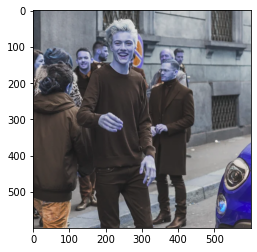

In [83]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_5.png'
img_bgr = cv2.imread(my_image_path)    # opencv로 이미지를 불러옴
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
plt.imshow(img_bgr)
plt.show()

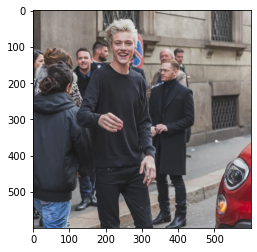

In [84]:
#cv2는 BGR을 사용하기 때문에 RGB로 바꿔주는 스텝이 필요해~
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### Bounding box, Landmark 검출

In [85]:
# bounding box 추출
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 2)   # (image, num of image pyramid)

rectangles[[(211, 74) (289, 152)], [(117, 122) (155, 159)], [(392, 119) (418, 145)]]


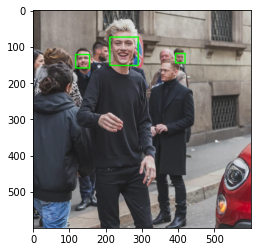

In [86]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [87]:
# Dlib의 제공되는 모델을 사용. 
# 먼저 공개되어 있는 weight file을 다운로드. 
# 해당 모델파일은 bz2 압축파일 형태로 제공되어 압축을 풀어준 후 사용.

# ! wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# ! mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models
# ! cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

In [88]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [89]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


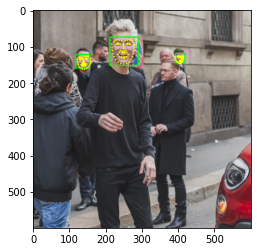

In [90]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [91]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print ('미간',landmark[27])
    x = landmark[27][0]
    y = landmark[27][1]
    w = dlib_rect.width()
    h = dlib_rect.width() // 2              #안경이라 이미지의 가로:세로 비율이 2:1정도 된다고 가정함
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

미간 (248, 91)
(x,y) : (248,91)
(w,h) : (79,39)
미간 (137, 132)
(x,y) : (137,132)
(w,h) : (39,19)
미간 (406, 129)
(x,y) : (406,129)
(w,h) : (27,13)


In [92]:
list_landmarks[0][27][0]

248

In [93]:
dlib_rects[0].width()

79

In [109]:
# 세 명의 얼굴 위치 기억

x1 = list_landmarks[0][27][0]
y1 = list_landmarks[0][27][1]
w1 = dlib_rects[0].width()
h1 = dlib_rects[0].width() // 2

x2 = list_landmarks[1][27][0]
y2 = list_landmarks[1][27][1]
w2 = dlib_rects[1].width()
h2 = dlib_rects[1].width() // 2

x3 = list_landmarks[2][27][0]
y3 = list_landmarks[2][27][1]
w3 = dlib_rects[2].width()
h3 = dlib_rects[2].width() // 2

### Sticker

In [95]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/glasses.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w1,h1))
print (img_sticker.shape)

(39, 79, 3)


In [96]:
sticker_path_2 = os.getenv('HOME')+'/aiffel/camera_sticker/images/glasses.png'
img_sticker_2 = cv2.imread(sticker_path_2) # 스티커 이미지를 불러옵니다
img_sticker_2 = cv2.resize(img_sticker_2, (w2,h2))
print (img_sticker_2.shape)

(19, 39, 3)


In [97]:
sticker_path_3 = os.getenv('HOME')+'/aiffel/camera_sticker/images/glasses.png'
img_sticker_3 = cv2.imread(sticker_path_3) # 스티커 이미지를 불러옵니다
img_sticker_3 = cv2.resize(img_sticker_3, (w3,h3))
print (img_sticker_3.shape)

(13, 27, 3)


In [98]:
refined_x1 = x1 - w1 // 2 
refined_y1 = y1 - h1 // 2         # 높이도 조정하였음
print ('(x,y) : (%d,%d)'%(refined_x1, refined_y1))

(x,y) : (209,72)


In [99]:
refined_x2 = x2 - w2 // 2 
refined_y2 = y2 - h2 // 2         # 높이도 조정하였음
print ('(x,y) : (%d,%d)'%(refined_x2, refined_y2))

(x,y) : (118,123)


In [100]:
refined_x3 = x3 - w3 // 2 
refined_y3 = y3 - h3 // 2         # 높이도 조정하였음
print ('(x,y) : (%d,%d)'%(refined_x3, refined_y3))

(x,y) : (393,123)


In [101]:
# 잘리는 부분이 없어서 스킵

# if refined_x < 0: 
#     img_sticker = img_sticker[:, -refined_x:]
#     refined_x = 0
# if refined_y < 0:
#     img_sticker = img_sticker[-refined_y:, :]
#     refined_y = 0

# print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

In [102]:
# 흰 배경의 bgr값이 255임: 255인곳은 sticker_area 사용, 255가 아닌 부분은 img_sticker 사용
sticker_area = img_show[refined_y1:refined_y1+img_sticker.shape[0], refined_x1:refined_x1+img_sticker.shape[1]]
img_show[refined_y1:refined_y1+img_sticker.shape[0], refined_x1:refined_x1+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


In [103]:
# 흰 배경의 bgr값이 255임: 255인곳은 sticker_area 사용, 255가 아닌 부분은 img_sticker 사용
sticker_area = img_show[refined_y2:refined_y2+img_sticker_2.shape[0], refined_x2:refined_x2+img_sticker_2.shape[1]]
img_show[refined_y2:refined_y2+img_sticker_2.shape[0], refined_x2:refined_x2+img_sticker_2.shape[1]] = \
    np.where(img_sticker_2==255,sticker_area,img_sticker_2).astype(np.uint8)
print("슝~")

슝~


In [104]:
# 흰 배경의 bgr값이 255임: 255인곳은 sticker_area 사용, 255가 아닌 부분은 img_sticker 사용
sticker_area = img_show[refined_y3:refined_y3+img_sticker_3.shape[0], refined_x3:refined_x3+img_sticker_3.shape[1]]
img_show[refined_y3:refined_y3+img_sticker_3.shape[0], refined_x3:refined_x3+img_sticker_3.shape[1]] = \
    np.where(img_sticker_3==255,sticker_area,img_sticker_3).astype(np.uint8)
print("슝~")

슝~


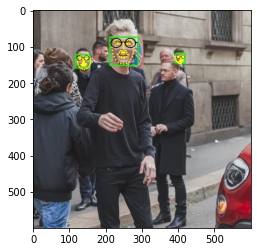

In [105]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

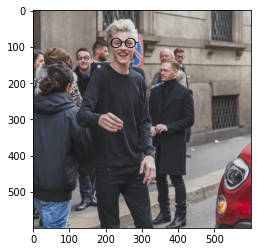

In [108]:
sticker_area = img_bgr[refined_y1:refined_y1+img_sticker.shape[0], refined_x1:refined_x1+img_sticker.shape[1]]
img_bgr[refined_y1:refined_y1+img_sticker.shape[0], refined_x1:refined_x1+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

sticker_area = img_bgr[refined_y2:refined_y2+img_sticker_2.shape[0], refined_x2:refined_x2+img_sticker_2.shape[1]]
img_bgr[refined_y2:refined_y2+img_sticker_2.shape[0], refined_x2:refined_x2+img_sticker_2.shape[1]] = \
    np.where(img_sticker_2==255,sticker_area,img_sticker_2).astype(np.uint8)

sticker_area = img_bgr[refined_y3:refined_y3+img_sticker_3.shape[0], refined_x3:refined_x3+img_sticker_3.shape[1]]
img_bgr[refined_y3:refined_y3+img_sticker_3.shape[0], refined_x3:refined_x3+img_sticker_3.shape[1]] = \
    np.where(img_sticker_3==255,sticker_area,img_sticker_3).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#  회고

#### opencv로 그림을 가져올 때

배경이 투명인 경우, 배경을 모두 검정색으로 처리해버리는 문제가 있기 때문에 imread("image.png", IMREAD_UNCHANGED) 로 불러와서, RGB값이 아닌 네 번째 채널값을 사용해야 하는데, 이번 단계에서는 너무 복잡할 것 같아서 스킵했다..

그런데 흰색 배경인 내 스티커 이미지를 가져올 때도 배경의 rgb값이 (255,255,255)였음. 그래서 배경을 제외할 때 255와 같으면 제외를 하는 방식으로 수정하여 사용하였음.

#### 안경 스티커

예시에 있던 왕관이미지와는 달리 안경 스티커는 가로, 세로 비율이 조금 달라서 가로세로 비율과 위치 등을 조정하여 사용하였다

#### 각도가 꺾인 얼굴을 인식할 때

본 노드에서 사용한 모델은 아예 face detection을 못함. (원래 Does not work for side face and extreme non-frontal faces, like looking down or up라는 단점이 있다고 함.)

그래서 dlib에 있는 다른 모델인 mmod_human_face_detector도 사용해봤는데, 이것도 얼굴을 디텍트를 못함..

#### 여러 사람의 얼굴이 있을 때

얼굴의 일부분이 가려지거나, 얼굴의 각도가 꺾여있으면 detect를 못함. 내 이미지에서는 정면으로 똑바로 찍힌 세 명의 얼굴만 감지하였음.

세 명의 얼굴 위치를 모두 사용하여 세명 얼굴 모두에 스티커를 붙이기 위해서 막노동을 했는데.....분명히 막노동 말고 방법이 있을텐데 아직 능력이 안되어서 포기하였음...